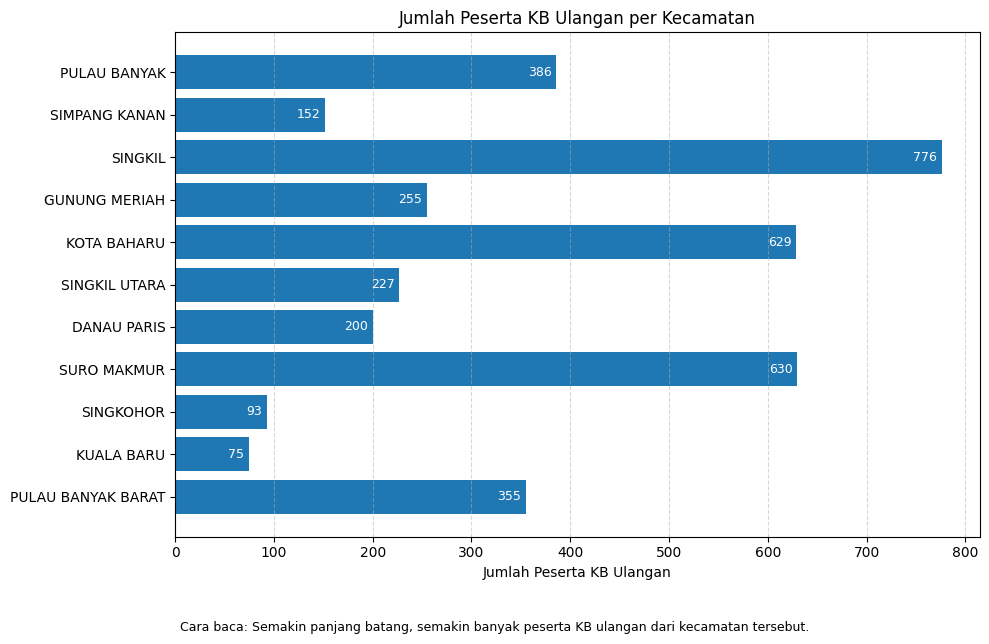

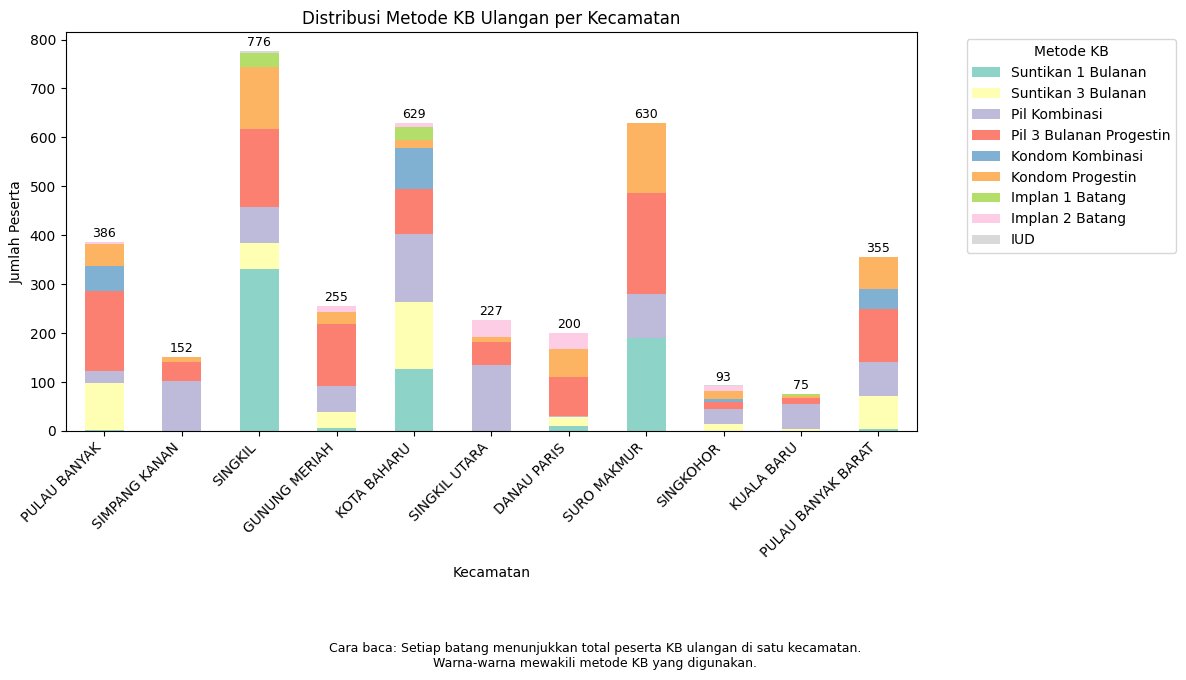

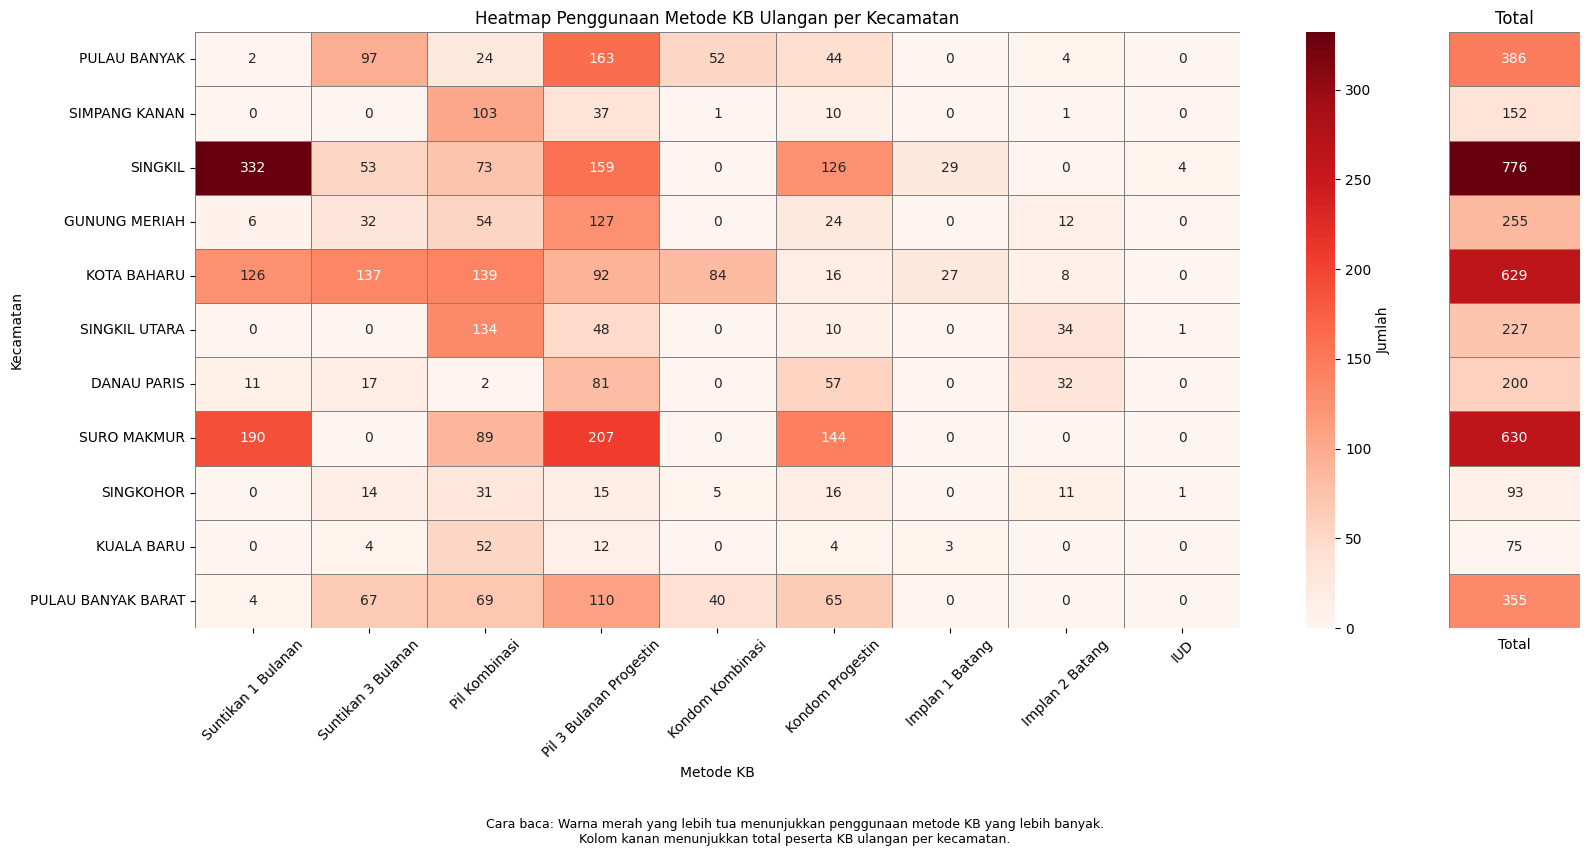

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Buat folder output jika belum ada
output_folder = "output_kb_ulangan"
os.makedirs(output_folder, exist_ok=True)

# --- 1. Buat DataFrame ---
data = {
    "Kecamatan": [
        "PULAU BANYAK", "SIMPANG KANAN", "SINGKIL", "GUNUNG MERIAH", "KOTA BAHARU",
        "SINGKIL UTARA", "DANAU PARIS", "SURO MAKMUR", "SINGKOHOR", "KUALA BARU", "PULAU BANYAK BARAT"
    ],
    "Jumlah Peserta KB Ulangan": [386, 152, 776, 255, 629, 227, 200, 630, 93, 75, 355],
    "Suntikan 1 Bulanan": [2, 0, 332, 6, 126, 0, 11, 190, 0, 0, 4],
    "Suntikan 3 Bulanan": [97, 0, 53, 32, 137, 0, 17, 0, 14, 4, 67],
    "Pil Kombinasi": [24, 103, 73, 54, 139, 134, 2, 89, 31, 52, 69],
    "Pil 3 Bulanan Progestin": [163, 37, 159, 127, 92, 48, 81, 207, 15, 12, 110],
    "Kondom Kombinasi": [52, 1, 0, 0, 84, 0, 0, 0, 5, 0, 40],
    "Kondom Progestin": [44, 10, 126, 24, 16, 10, 57, 144, 16, 4, 65],
    "Implan 1 Batang": [0, 0, 29, 0, 27, 0, 0, 0, 0, 3, 0],
    "Implan 2 Batang": [4, 1, 0, 12, 8, 34, 32, 0, 11, 0, 0],
    "IUD": [0, 0, 4, 0, 0, 1, 0, 0, 1, 0, 0]
}

df = pd.DataFrame(data)

# Simpan total metode KB
metode_cols = df.columns[2:]
df_metode_only = df[metode_cols].copy()

# --- 2. Grafik 1: Bar Jumlah Peserta KB Ulangan ---
plt.figure(figsize=(10, 6))
bars = plt.barh(df["Kecamatan"], df["Jumlah Peserta KB Ulangan"], color="#1f77b4")
plt.xlabel("Jumlah Peserta KB Ulangan")
plt.title("Jumlah Peserta KB Ulangan per Kecamatan")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.figtext(0.5, -0.06,
            "Cara baca: Semakin panjang batang, semakin banyak peserta KB ulangan dari kecamatan tersebut.",
            ha='center', fontsize=9)

# Tambahkan label dalam batang
for bar in bars:
    width = bar.get_width()
    plt.text(width - 5, bar.get_y() + bar.get_height()/2, f"{int(width)}", va='center', ha='right', color='white', fontsize=9)

plt.tight_layout()
plt.savefig(f"{output_folder}/peserta_kb_ulangan_per_kecamatan.png", bbox_inches='tight')
plt.show()

# --- 3. Grafik 2: Stacked bar metode KB ---
df_stacked = df.drop(columns=["Jumlah Peserta KB Ulangan"]).set_index("Kecamatan")
colors = sns.color_palette("Set3", n_colors=len(df_stacked.columns))

ax = df_stacked.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)
plt.title("Distribusi Metode KB Ulangan per Kecamatan")
plt.ylabel("Jumlah Peserta")
plt.xlabel("Kecamatan")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Metode KB", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.figtext(0.5, -0.12,
            "Cara baca: Setiap batang menunjukkan total peserta KB ulangan di satu kecamatan.\n"
            "Warna-warna mewakili metode KB yang digunakan.",
            ha='center', fontsize=9)

# Tambahkan label total di atas setiap batang
totals = df_stacked.sum(axis=1)
for i, total in enumerate(totals):
    plt.text(i, total + 10, str(int(total)), ha='center', fontsize=9)

plt.tight_layout()
plt.savefig(f"{output_folder}/stacked_kb_ulangan_per_kecamatan.png", bbox_inches='tight')
plt.show()

# --- 4. Grafik 3: Heatmap Utama + Strip Total ---
df_heatmap = df.set_index("Kecamatan").drop(columns=["Jumlah Peserta KB Ulangan"])

# Hitung kolom total per kecamatan
total_col = df_heatmap.sum(axis=1).to_frame(name='Total')

# Setup 2 subplot berdampingan
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8), 
                               gridspec_kw={"width_ratios": [10, 1]}, sharey=True)

# Heatmap utama (tanpa kolom total)
sns.heatmap(
    df_heatmap, ax=ax1,
    annot=True, fmt=".0f", cmap="Reds",
    linewidths=0.5, linecolor='gray',
    cbar_kws={'label': 'Jumlah'}
)
ax1.set_title("Heatmap Penggunaan Metode KB Ulangan per Kecamatan")
ax1.set_xlabel("Metode KB")
ax1.set_ylabel("Kecamatan")
ax1.tick_params(axis='x', rotation=45)

# Heatmap kolom Total sebagai strip vertikal di samping kanan
sns.heatmap(
    total_col, ax=ax2,
    annot=True, fmt=".0f", cmap="Reds",
    linewidths=0.5, linecolor='gray',
    cbar=False  # tanpa colorbar kedua
)
ax2.set_title("Total")
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.tick_params(left=False, labelleft=False, bottom=False)

# Keterangan di bawah
plt.figtext(0.5, -0.06,
    "Cara baca: Warna merah yang lebih tua menunjukkan penggunaan metode KB yang lebih banyak.\n"
    "Kolom kanan menunjukkan total peserta KB ulangan per kecamatan.",
    ha='center', fontsize=9)

plt.tight_layout()
plt.savefig(f"{output_folder}/heatmap_kb_ulangan_dengan_total_strip.png", bbox_inches='tight')
plt.show()


